In [1]:
from util import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

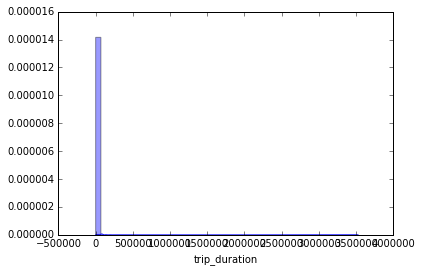

In [4]:
start = time.time()
sns.distplot((train.trip_duration))
plt.show()

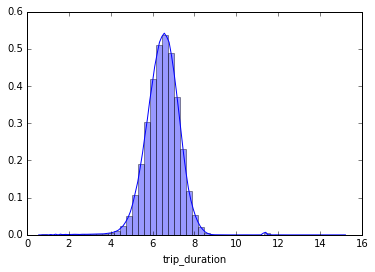

In [3]:
start = time.time()
sns.distplot(np.log(train.trip_duration+1),color="r")
plt.show()

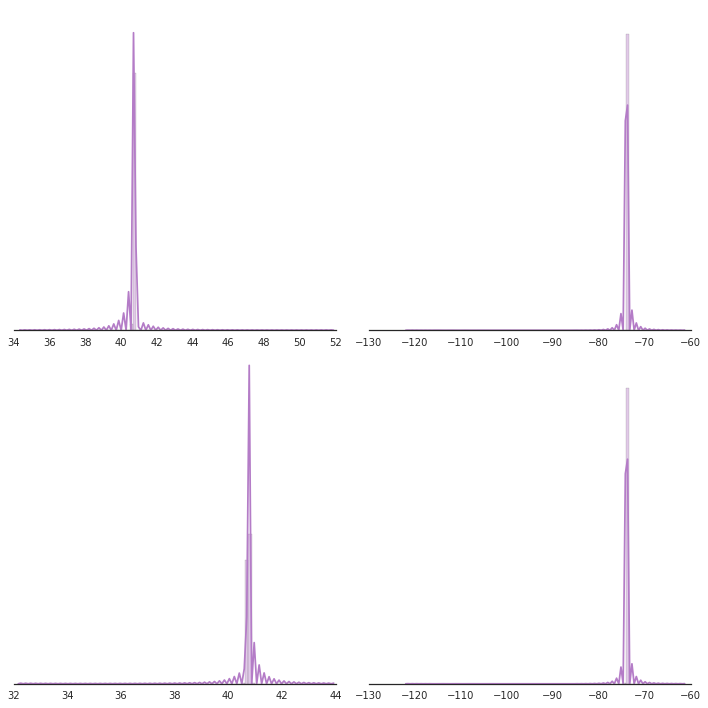

In [7]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(train['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(train['pickup_longitude'].values, label = 'pickup_longitude',color="m",bins =100, ax=axes[0,1])
sns.distplot(train['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(train['dropoff_longitude'].values, label = 'dropoff_longitude',color="m",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [5]:
xlim = [-74.03, -73.77]
ylim = [40.6, 40.9]

train_copy = train[["pickup_longitude","dropoff_longitude","pickup_latitude","dropoff_latitude"]].copy()

train_copy = train_copy[(train_copy.pickup_longitude >= xlim[0]) & (train_copy.pickup_longitude <= xlim[1])]
train_copy = train_copy[(train_copy.dropoff_longitude >= xlim[0]) & (train_copy.dropoff_longitude <= xlim[1])]
train_copy = train_copy[(train_copy.pickup_latitude >= ylim[0]) & (train_copy.pickup_latitude <= ylim[1])]
train_copy = train_copy[(train_copy.dropoff_latitude >= ylim[0]) & (train_copy.dropoff_latitude <= ylim[1])]

test_copy = test[["pickup_longitude","dropoff_longitude","pickup_latitude","dropoff_latitude"]].copy()

test_copy = test_copy[(test_copy.pickup_longitude >= xlim[0]) & (test_copy.pickup_longitude <= xlim[1])]
test_copy = test_copy[(test_copy.dropoff_longitude >= xlim[0]) & (test_copy.dropoff_longitude <= xlim[1])]
test_copy = test_copy[(test_copy.pickup_latitude >= ylim[0]) & (test_copy.pickup_latitude <= ylim[1])]
test_copy = test_copy[(test_copy.dropoff_latitude >= ylim[0]) & (test_copy.dropoff_latitude <= ylim[1])]

train_lons = list(train_copy.pickup_longitude) + list(train_copy.dropoff_longitude)
train_lats = list(train_copy.pickup_latitude) + list(train_copy.dropoff_latitude)

test_lons = list(test_copy.pickup_longitude) + list(test_copy.dropoff_longitude)
test_lats = list(test_copy.pickup_latitude) + list(test_copy.dropoff_latitude)

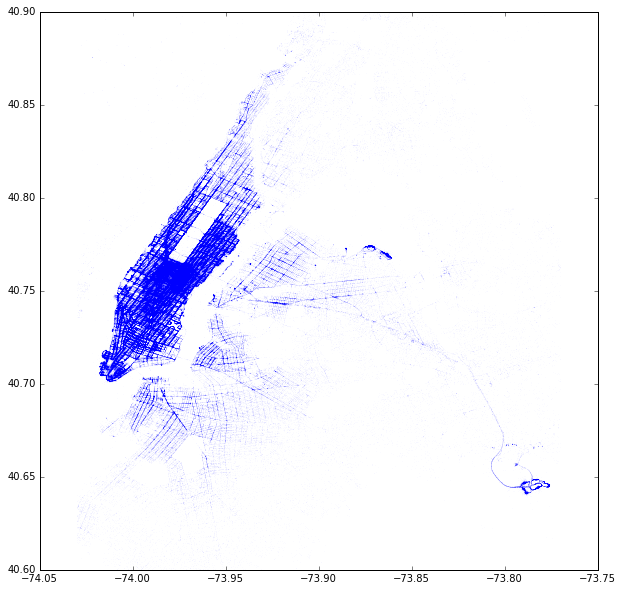

In [6]:
plt.figure(figsize=(10,10))
plt.plot(train_lons,train_lats,'.',alpha = 0.4,markersize=0.05)
plt.show()

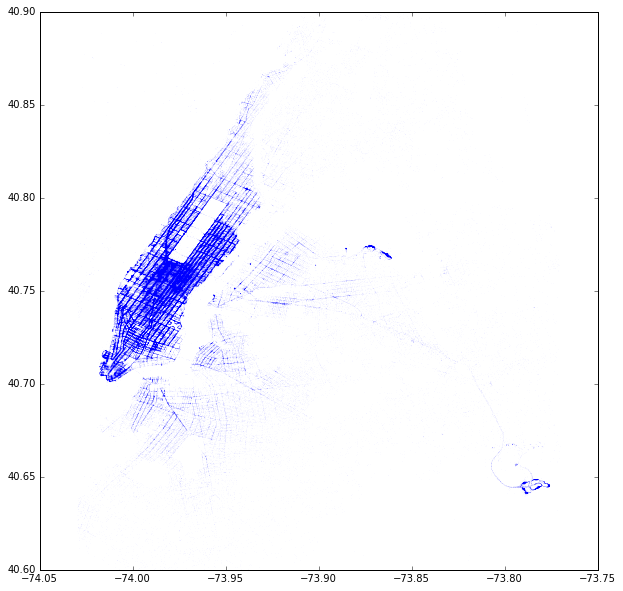

In [7]:
plt.figure(figsize=(10,10))
plt.plot(test_lons,test_lats,'.',alpha = 0.4,markersize=0.05)
plt.show()

In [6]:
from sklearn.cluster import KMeans
loc_df = pd.DataFrame()
loc_df["lons"] = train_lons
loc_df["lats"] = train_lats

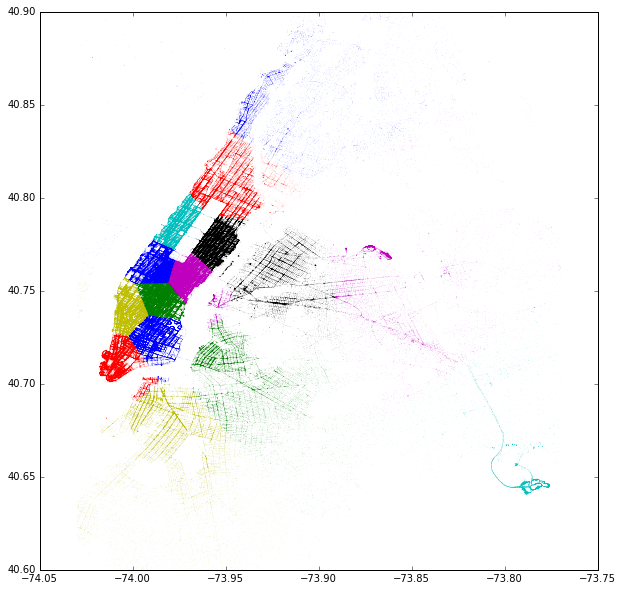

In [8]:
cluster = KMeans(n_clusters=15,random_state=2017)
cluster.fit(loc_df)
loc_df["label"] = cluster.labels_
plt.figure(figsize=(10,10))
for _label in loc_df.label.unique():
    plt.plot(loc_df[loc_df.label == _label].lons,loc_df[loc_df.label == _label].lats,".",alpha=0.4,markersize=0.1)
plt.show()

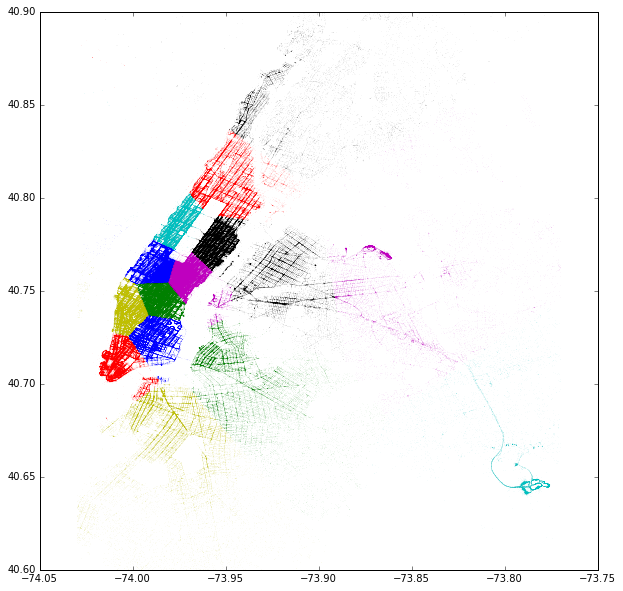

In [11]:
cluster = KMeans(n_clusters=100,random_state=2017)
cluster.fit(loc_df)
loc_df["label"] = cluster.labels_
plt.figure(figsize=(10,10))
for _label in loc_df.label.unique():
    plt.plot(loc_df[loc_df.label == _label].lons,loc_df[loc_df.label == _label].lats,".",alpha=0.4,markersize=0.1)
plt.show()